In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.image as pl
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
model = tf.keras.models.load_model('digit_recoginition.h5')

In [3]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [14]:
img_path =r'images/rec/9.jpg'

In [15]:
org_image =cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

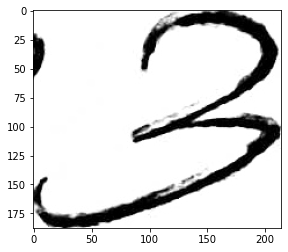

In [16]:
plt.imshow(org_image, cmap='gray')

In [17]:
bin_image = cv2.threshold(org_image, 127, 255, cv2.THRESH_BINARY_INV) [1]
#bin_image = cv2.adaptiveThreshold(org_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11,2)

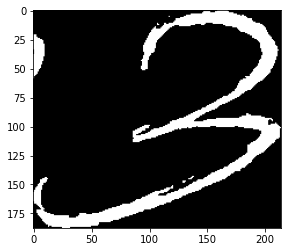

In [18]:
plt.imshow(bin_image, cmap='gray')

In [19]:
inverted_image = cv2.bitwise_not(bin_image)
kernel = np.ones((15,15), np. uint8) 
edged = cv2.morphologyEx(inverted_image, cv2.MORPH_GRADIENT ,kernel)
kernel = np.ones((5,5), np. uint8)
edged = cv2.morphologyEx(edged, cv2.MORPH_OPEN, kernel)
edged = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

kernel = np.ones((15,15), np. uint8)
edged = cv2.erode(edged, kernel, iterations=1)

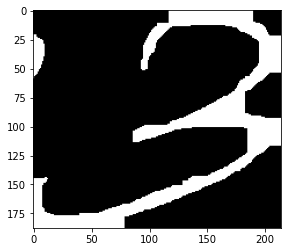

In [20]:
plt.imshow(edged, cmap='gray')

In [21]:
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(edged, (28, 28))
image = image / 255.0
input_image = np.reshape(image, (1, 28, 28))

In [22]:
predicted_labels = model.predict(input_image)
predicted_digit = np.argmax(predicted_labels)
print(f"Predicted Digit: {predicted_digit}")

Predicted Digit: 6
